## 설치
conda install opencv matplotlib numpy <br />

### Image Threshold
cv2.threshold(src,tresh,maxval,type) -->  retval, dst

retval : otsu의 이진화와 관련

Parameter: 
- src: input image로 single-channel image (grayscale을 사용)
- thresh: 임계값
- maxval: 임계값을 넘었을 때 적용할 value (흑백의 경우 255)
- type: thresholding type

Thresholding Type: 
- *cv2.THRESH_BINARY*
- *cv2.THRESH_BINARY_INV*
- *cv2.THRESH_BINARY_TRUNC*
- *cv2.THRESH_BINARY_TOZERO*
- *cv2.THRESH_BINARY_TOZERO_INV*


In [1]:
from __future__ import print_function

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./picture/radial_gradient.png',0)
#img = cv2.imread('./picture/len_top.jpg',0)
treshold = 100
ret,thresh1 = cv2.threshold(img,treshold,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,treshold,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,treshold,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,treshold,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,treshold,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

#plt.show()

### Adaptive Threshold
cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C) = dst

Parameters:
- src: grayscale image
- maxValue: 임계값을 넘었을 때 적용할 value
- adaptiveMethod: threshold value를 찾기 위해 계산하는 방법
- thresholdType: threshold type
- blockSize: thresholding을 적용할 영역 크기
- C: Mean이나 gaussian mean에서 차감할 값

AdaptiveMethod:
- *cv2.ADAPTIVE_THRESH_MEAN_C*: block size 내의 각 픽셀 값의 평균을 threshold로 사용
- *cv2.ADAPTIVE_THRESH_GAUSSIAN_C*: block size에 맞게 gaussian filter를 생성해 wegited sum을 threshold로 사용

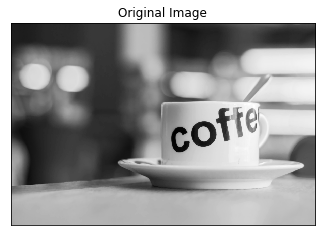

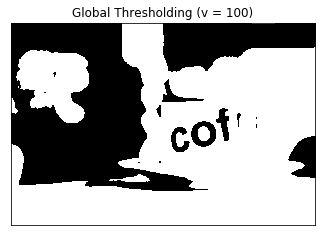

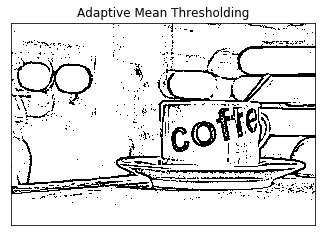

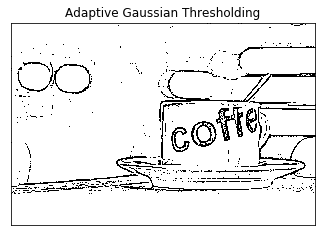

In [2]:
img = cv2.imread('./picture/coffe.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,treshold,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,15,2)

titles = ['Original Image', 'Global Thresholding (v = 100)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]


for i in range(4):
    plt.figure(figsize=(12,10)) ## 
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray') 
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Otsu Thresholding
cv2.threshold(src, thresh, maxval, type) = retval, dst

in type:
- *cv2.THRESH_BINARY + cv2.THRESH_OTSU*
- *cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU*
- *cv2.THRESH_BINARY_TRUNC + cv2.THRESH_OTSU*
- *cv2.THRESH_BINARY_TOZERO + cv2.THRESH_OTSU*
- *cv2.THRESH_BINARY_TOZERO_INV + cv2.THRESH_OTSU*

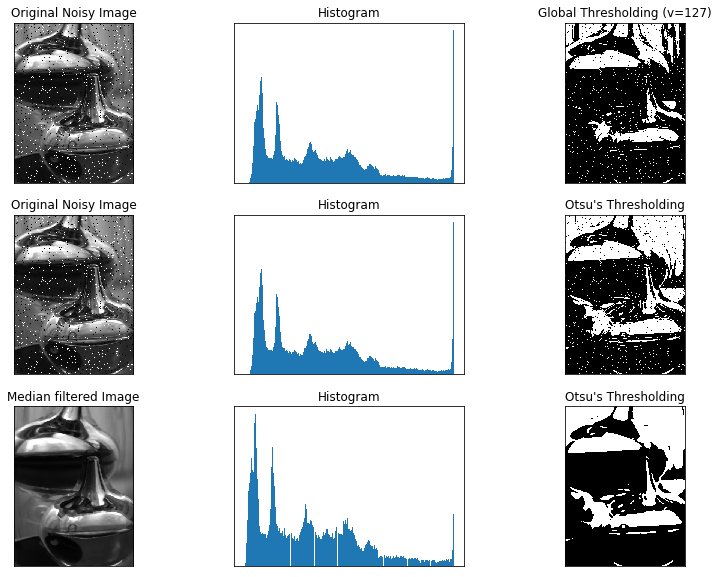

127.0 102.0 97.0


In [5]:
img = cv2.imread('./picture/noise.png',0)

#retval : otsu의 이진화를 통해 구해진 최적의 threshold 값 
# global thresholding
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after median filtering
blur = cv2.medianBlur(img,5)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1, img, 0, th2, blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)', 'Original Noisy Image','Histogram',"Otsu's Thresholding", 'Median filtered Image','Histogram',"Otsu's Thresholding"]

##
fig = plt.figure(figsize=(14,10))

for i in range(3):
	plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
	plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
	plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
	plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
	plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
	plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()

print (ret1, ret2, ret3)

### Image Smoothing
cv2.blur(src,ksize) = dst

Parameters:
- src: input image
- ksize: kernel size (ex: (3,3))

cv2.GaussianBlur(img, ksize, sigmaX) = dst

Parameters:
- img: input image
- ksize: kernel size (ex: (3x3))
- sigmaX: Gaussian kernel standard deviation in X direction

cv2.medianBlur(src, ksize) = dst

Parameters:
- src: input image
- ksize: odd number larger than 1

UniformNoise


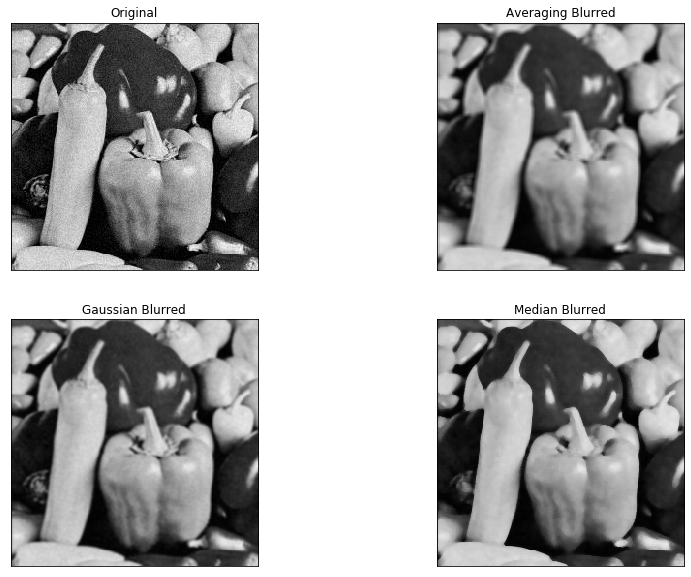

GaussianNoise


<Figure size 1008x720 with 0 Axes>

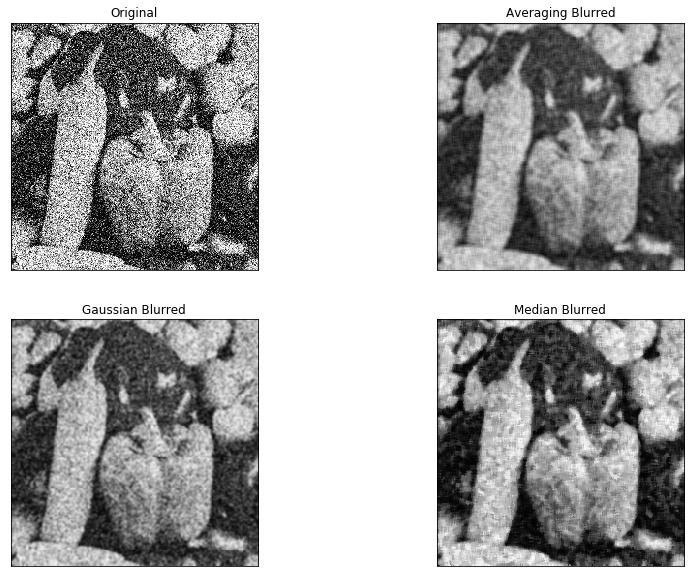

SaltAndPepperNoise


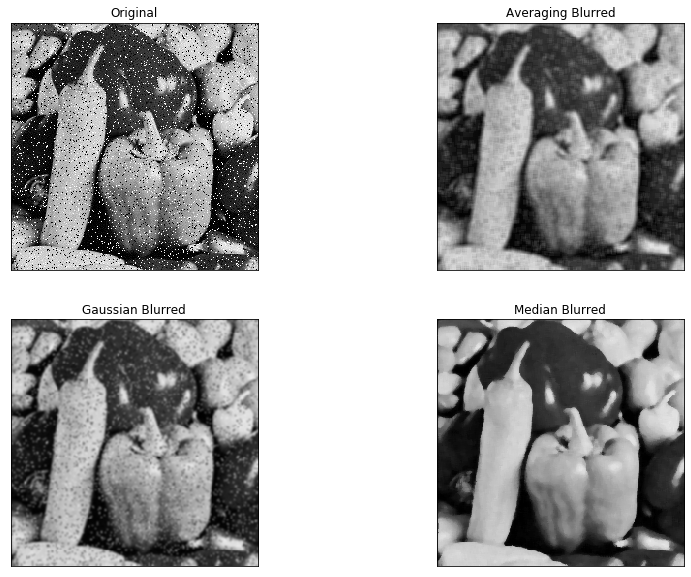

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./picture/UniformNoise.jpg')

averaging_blur = cv2.blur(img,(5,5))
gaussian_blur = cv2.GaussianBlur(img,(5,5),0)
median_blur = cv2.medianBlur(img,5)

##
fig = plt.figure(figsize=(14,10))


print("UniformNoise")
plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(averaging_blur),plt.title('Averaging Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(gaussian_blur),plt.title('Gaussian Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(median_blur),plt.title('Median Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


##
fig = plt.figure(figsize=(14,10))

img = cv2.imread('./picture/GaussianNoise.jpg')

averaging_blur = cv2.blur(img,(5,5))
gaussian_blur = cv2.GaussianBlur(img,(5,5),0)
median_blur = cv2.medianBlur(img,5)


##
fig = plt.figure(figsize=(14,10))


print("GaussianNoise")
plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(averaging_blur),plt.title('Averaging Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(gaussian_blur),plt.title('Gaussian Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(median_blur),plt.title('Median Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

img = cv2.imread('./picture/SaltAndPepperNoise.jpg')

averaging_blur = cv2.blur(img,(5,5))
gaussian_blur = cv2.GaussianBlur(img,(5,5),0)
median_blur = cv2.medianBlur(img,5)


##
fig = plt.figure(figsize=(14,10))


print("SaltAndPepperNoise")
plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(averaging_blur),plt.title('Averaging Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(gaussian_blur),plt.title('Gaussian Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(median_blur),plt.title('Median Blurred')
plt.xticks([]), plt.yticks([])
plt.show()